In [9]:
"""
===========================
Fitting an auto_arima model
===========================


This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the :ref:`datasets` submodule.

.. raw:: html

   <br/>
"""
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pathlib import Path
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from library.common import Core


Fitting an auto_arima model


This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the :ref:`datasets` submodule.

.. raw:: html

   <br/>



In [10]:
from pathlib import Path
import pandas as pd
core = Core()

max_p = 20
max_d = 20
max_q = 20
max_P = 10
max_D = 10
max_Q = 10


In [11]:
def forecast(data, start_year, model):
    # #############################################################################
    # Load the data and split it into separate pieces

    train, test = model_selection.train_test_split(data, train_size=len(data)-5)

    # Fit a simple auto_arima model
    modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=max_p, max_d = max_d, max_q=max_q,
                         max_P= max_P, max_D= max_D, max_Q= max_Q,
                         # max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, seasonal = True,
                         # D=10, max_D=10,
                         error_action='ignore')

    # Create predictions for the future, evaluate on test
    preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

    # Print the error:
    print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

    # #############################################################################
    # Plot the points and the forecasts
    x_axis = np.arange(train.shape[0] + preds.shape[0])
    x_years = x_axis + start_year  # Year starts at 1821


    plt.figure(figsize = (25, 5))
    plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
    plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
    plt.scatter(x_years[x_axis[train.shape[0]:]], test,
                alpha=0.4, marker='x')  # Test data
    plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.2, color='b')
    plt.ylim(ymin=0)
    plt.title(f"{model} Forecast")
    plt.xlabel("Year")

    plt.show()

In [12]:


selected_features = core.regression_features
cwd = Path.cwd()
ts_timeframe = cwd.parent / 'data'
ts_timeframe = ts_timeframe / 'processed'
ts_timeframe = ts_timeframe / 'timeseries_start_stop.pkl'
ts_period = pd.read_pickle(ts_timeframe)


# ts_period = ts_period.loc[selected_features[4:], :]
last_year = ts_period.stop.min().item()
forecast_param = {'last_period': last_year}

regions = core.regions
world = core.world

for r in core.list_of_regions:
    print(r)
    print(core.regions.get(r))


Cluster 0
['AFG', 'ALB', 'AND', 'AGO', 'ATG', 'ARM', 'ABW', 'BHS', 'BHR', 'BRB', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'VGB', 'BRN', 'BFA', 'BDI', 'KHM', 'CMR', 'CPV', 'CAF', 'TCD', 'COM', 'COG', 'CRI', 'CIV', 'CUB', 'CUW', 'COD', 'DJI', 'DMA', 'DOM', 'SLV', 'GNQ', 'ERI', 'SWZ', 'ETH', 'FRO', 'FJI', 'PYF', 'GAB', 'GMB', 'GEO', 'GHA', 'GRL', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'ISL', 'ATA', 'JAM', 'JOR', 'KEN', 'KIR', 'KGZ', 'LAO', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'MDG', 'MWI', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MDA', 'MNG', 'MNE', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'CXR', 'NCL', 'NIC', 'NER', 'NGA', 'PRK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PRI', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'STP', 'SEN', 'SRB', 'SYC', 'SLE', 'SXM', 'SLB', 'SOM', 'SSD', 'LKA', 'SDN', 'SUR', 'SYR', 'TJK', 'TZA', 'TLS', 'TGO', 'TON', 'TUN', 'TCA', 'TUV', 'UGA', 'URY', 'VUT', 'YEM', 'ZMB', 'ZWE', 'AIA', 'BES', 'COK', 'GUF', 'GLP', 'MTQ', 'MYT', 'MSR', 'NIU', 'SHN', 'SPM', 'TWN', 'A

FEATURE  population REGION  Cluster 0
START  1750
ALT START  1950
Test RMSE: 4844011.228


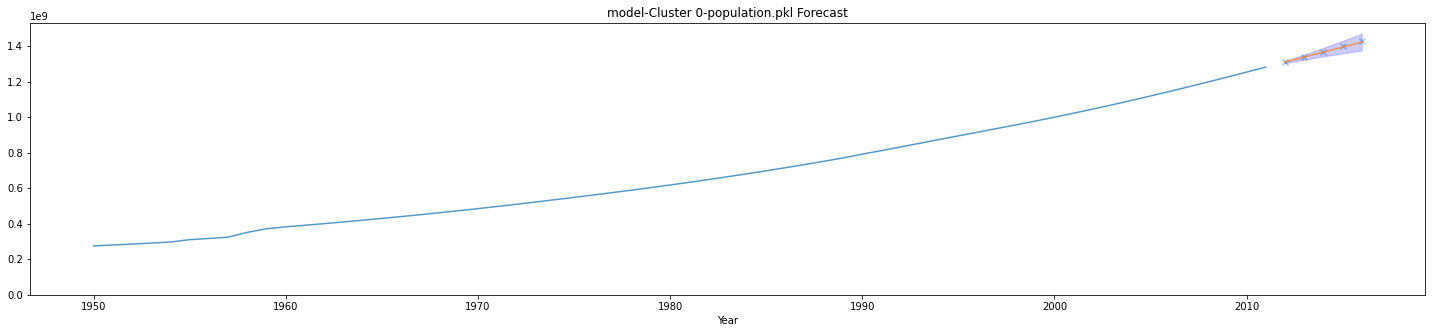

model-Cluster 0-population.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 0
START  1960
ALT START  1970
Test RMSE: 17217.297


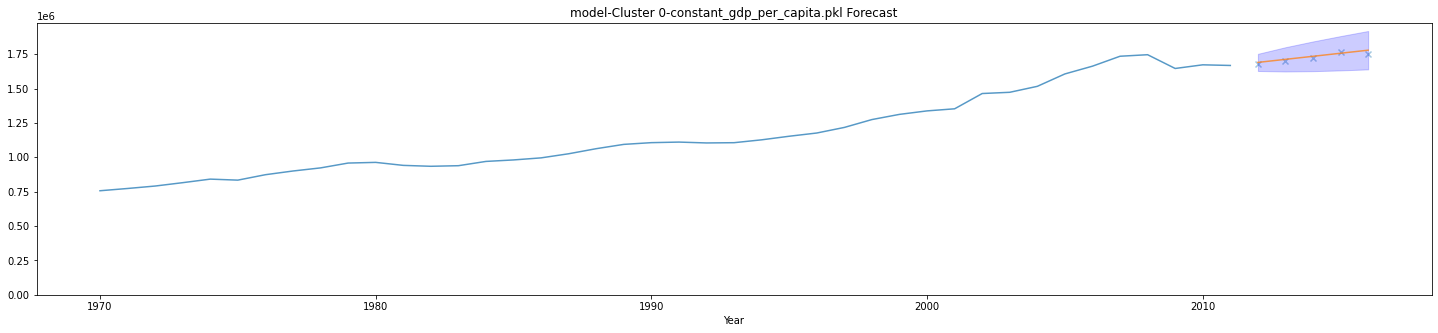

model-Cluster 0-constant_gdp_per_capita.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 0
START  1960
ALT START  1990
Test RMSE: 0.562


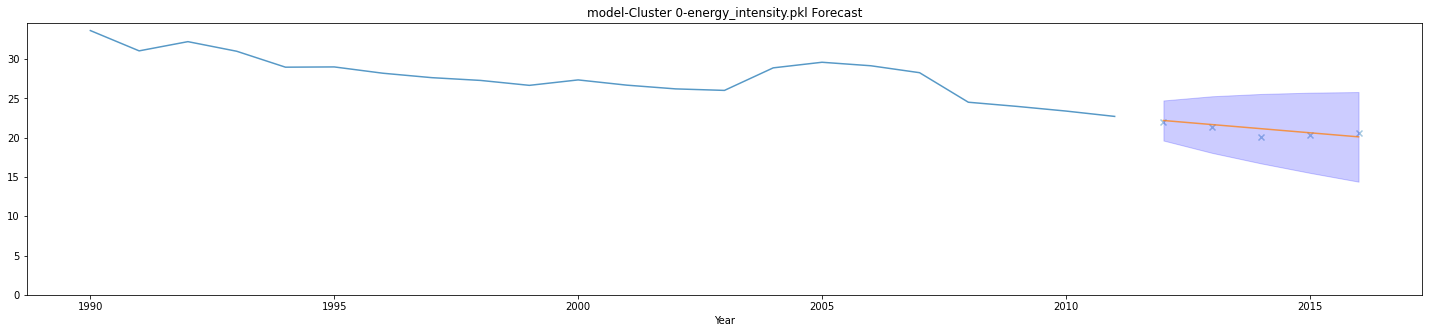

model-Cluster 0-energy_intensity.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 39.026


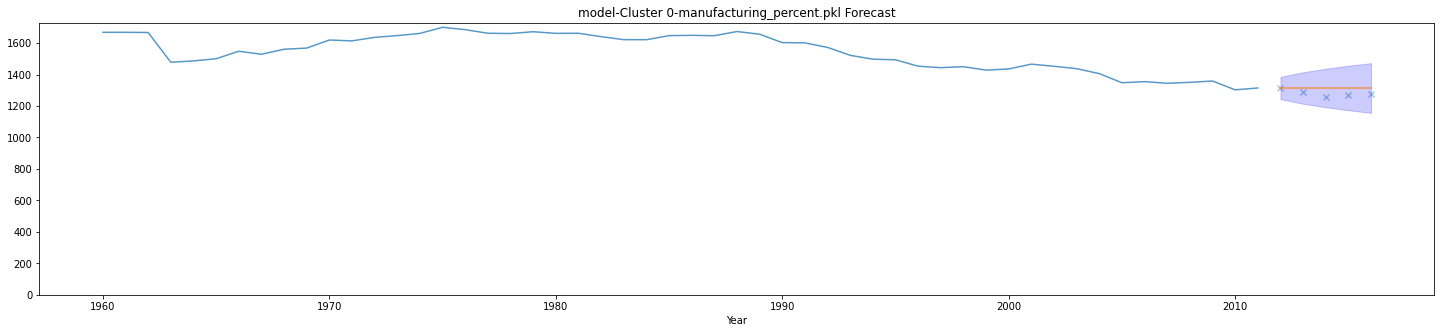

model-Cluster 0-manufacturing_percent.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 1070.469


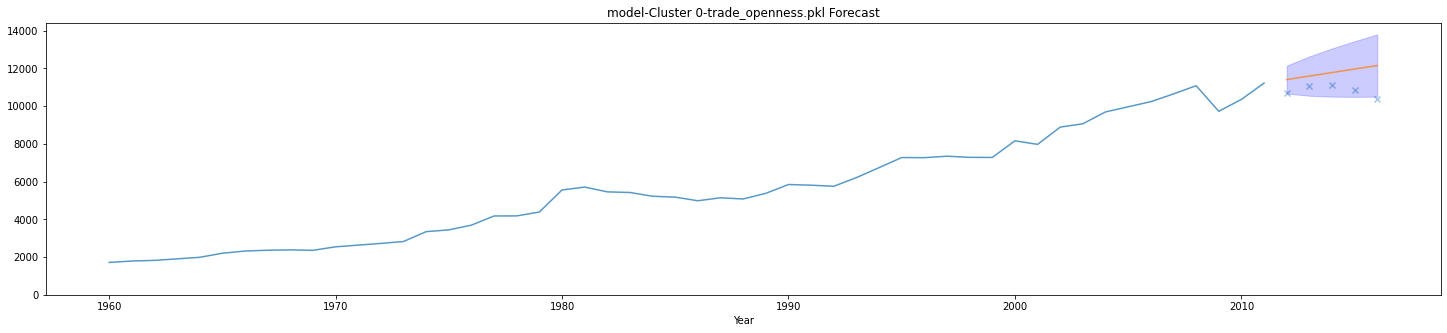

model-Cluster 0-trade_openness.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 0
START  1971
ALT START  1990
Test RMSE: 140.946


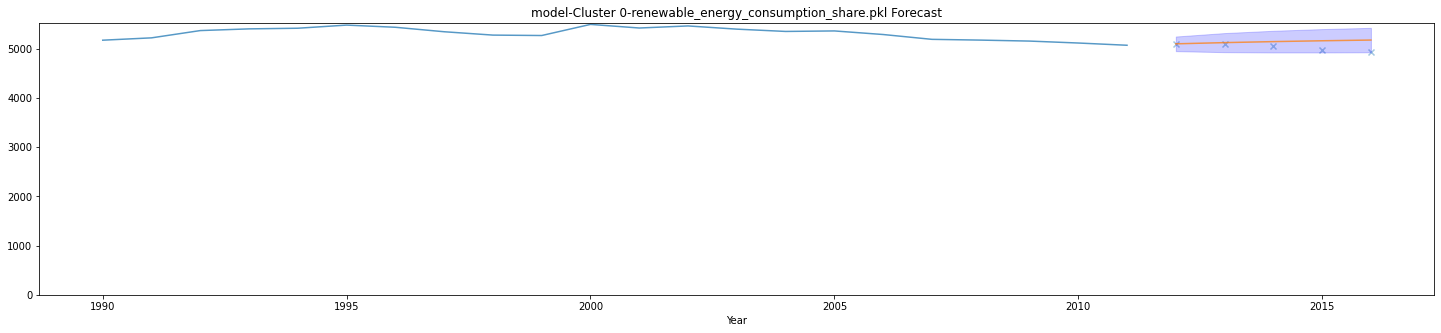

model-Cluster 0-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  population REGION  Cluster 1
START  1750
ALT START  1950
Test RMSE: 21081816.539


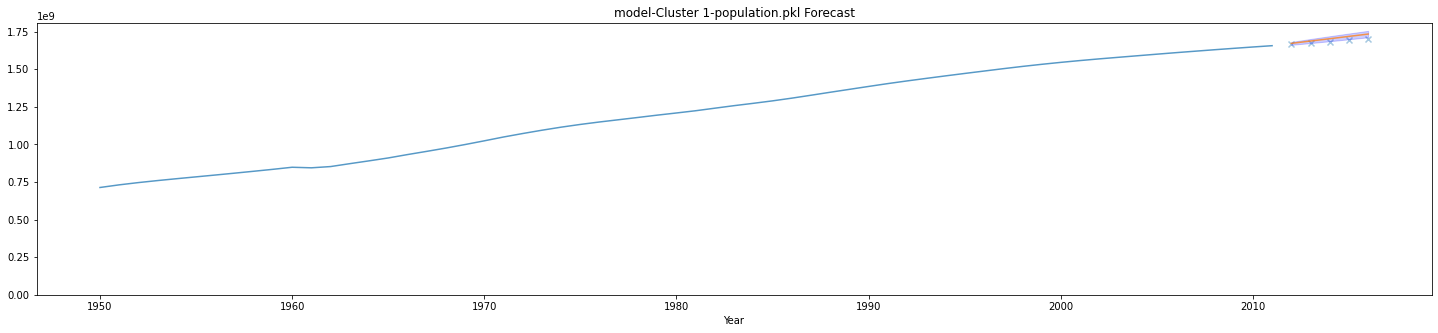

model-Cluster 1-population.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 1
START  1960
ALT START  1970
Test RMSE: 1614.735


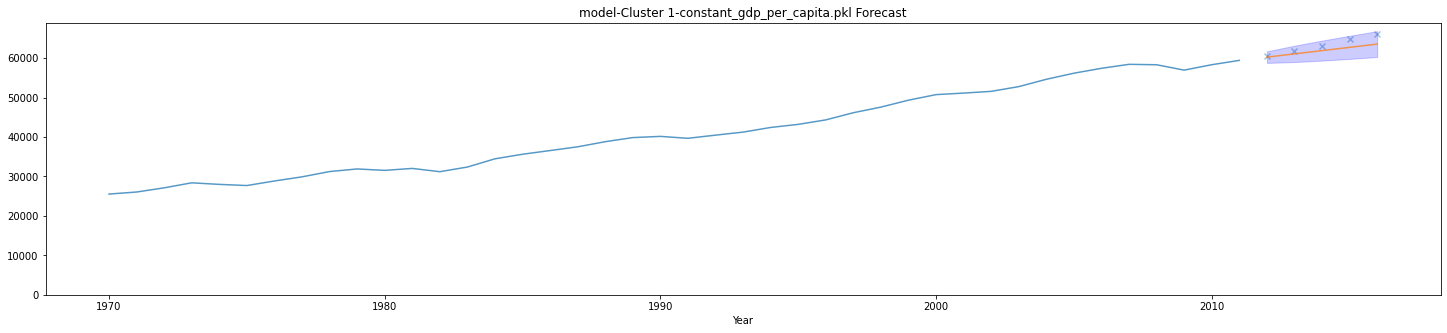

model-Cluster 1-constant_gdp_per_capita.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 1
START  1960
ALT START  1990
Test RMSE: 0.020


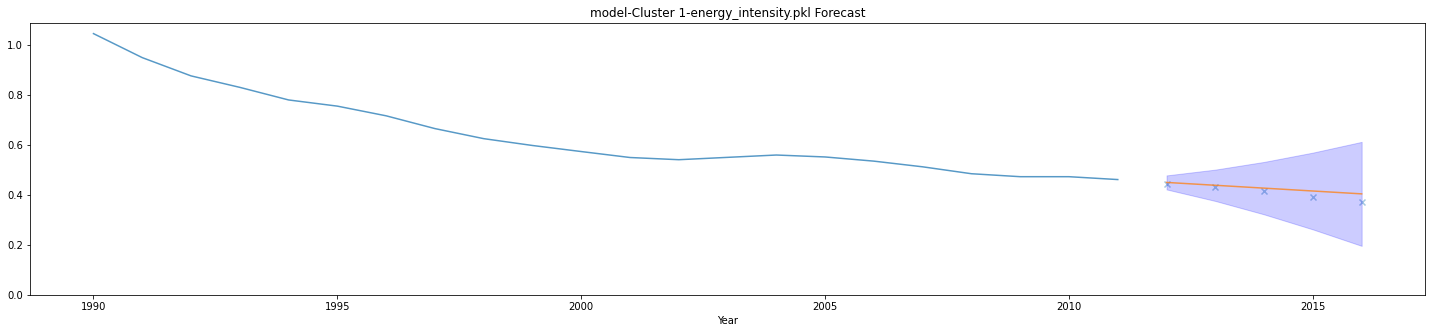

model-Cluster 1-energy_intensity.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 2.606


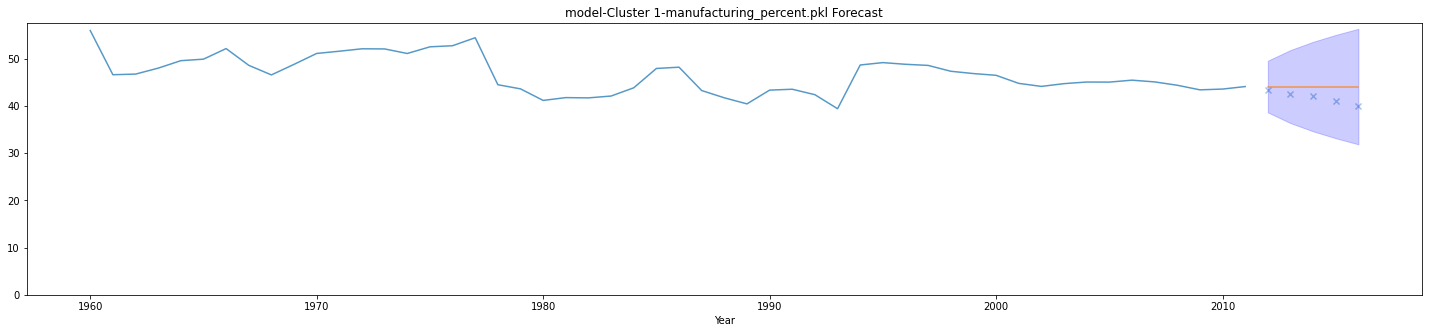

model-Cluster 1-manufacturing_percent.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 15.893


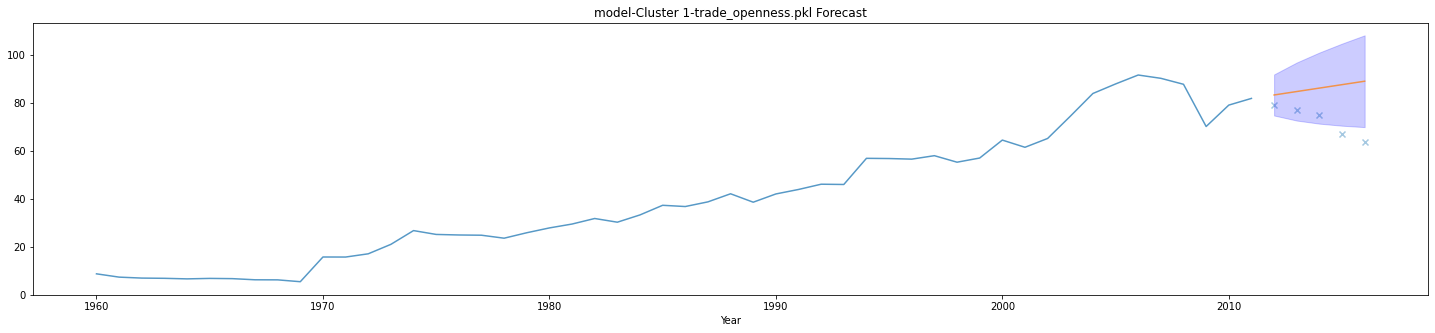

model-Cluster 1-trade_openness.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 1
START  1971
ALT START  1990
Test RMSE: 1.766


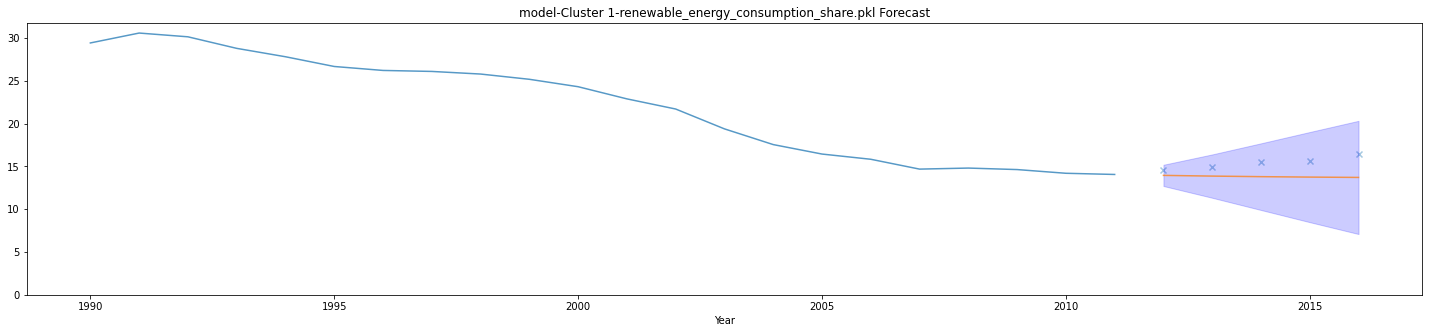

model-Cluster 1-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  population REGION  Cluster 2
START  1750
ALT START  1950
Test RMSE: 6720837.575


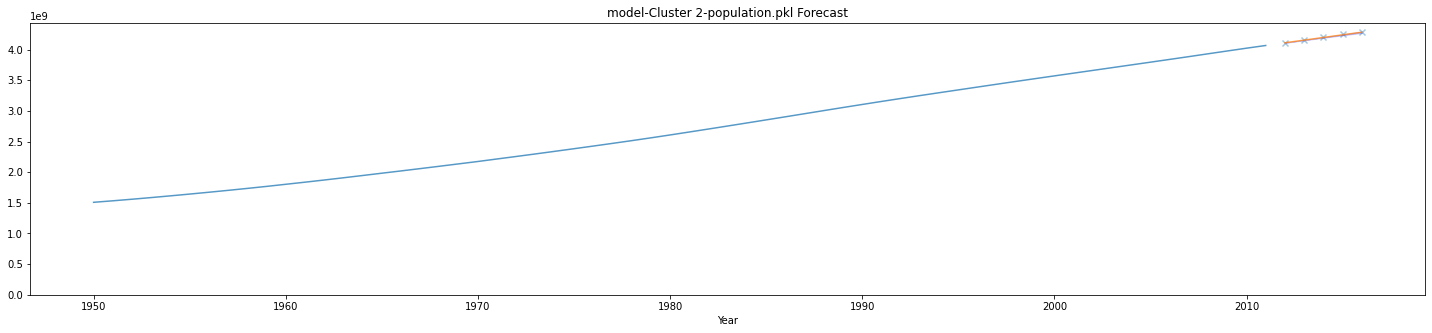

model-Cluster 2-population.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 2
START  1960
ALT START  1970
Test RMSE: 14759.051


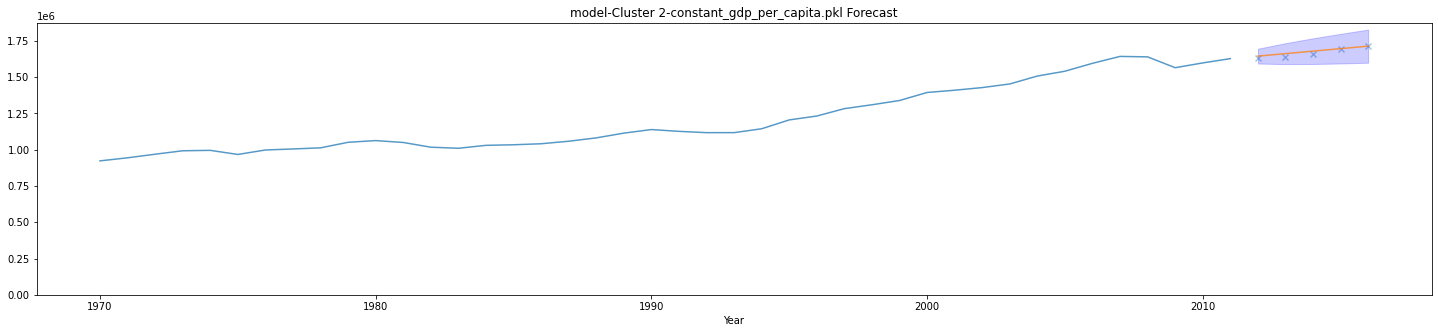

model-Cluster 2-constant_gdp_per_capita.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 2
START  1960
ALT START  1990
Test RMSE: 0.568


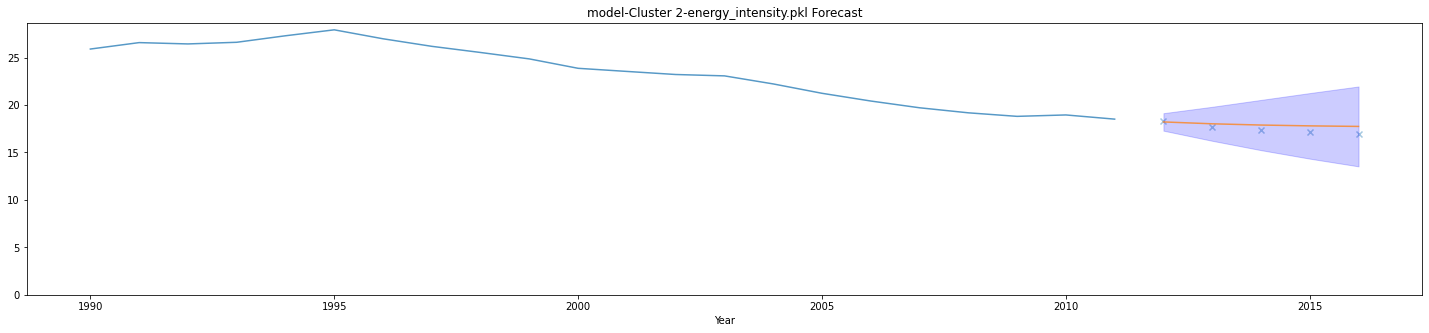

model-Cluster 2-energy_intensity.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 24.273


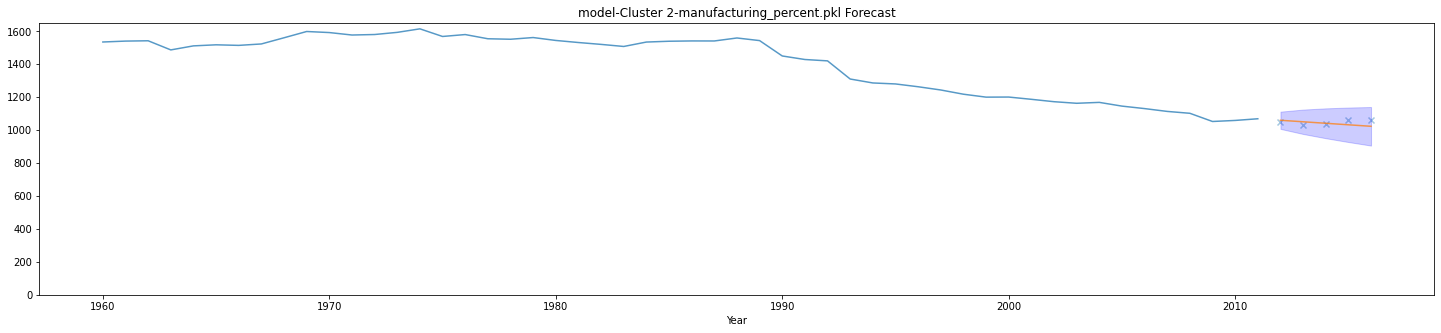

model-Cluster 2-manufacturing_percent.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 569.284


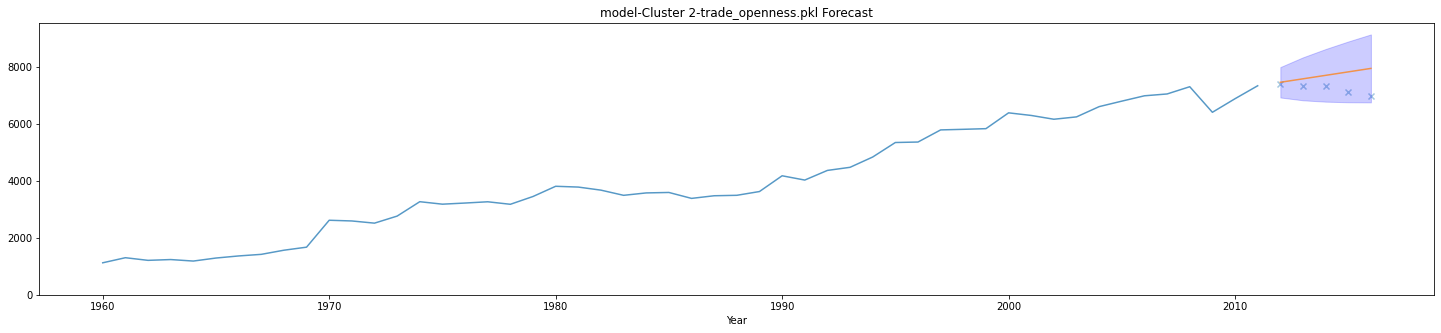

model-Cluster 2-trade_openness.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 2
START  1971
ALT START  1990
Test RMSE: 101.203


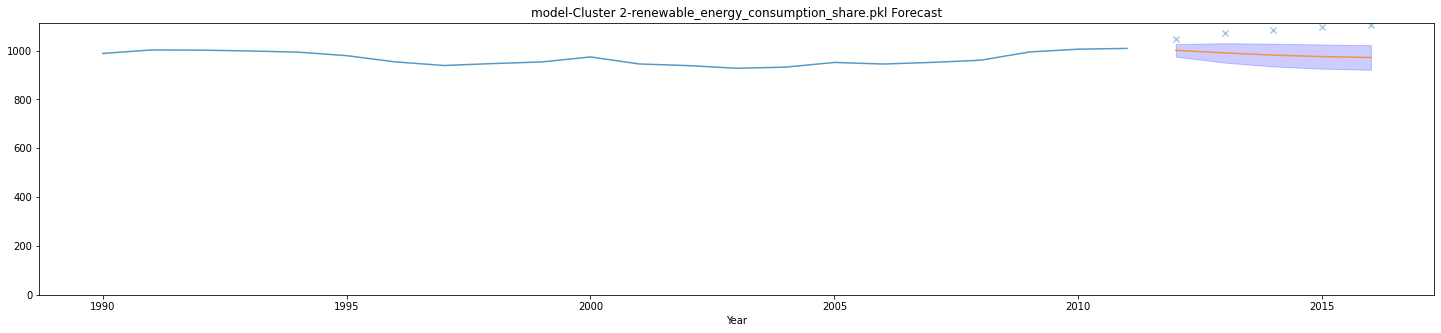

model-Cluster 2-renewable_energy_consumption_share.pkl COMPLETED


In [13]:

def aggregrate_region(df, countries):
    r_df = df.copy()

    if not (countries == core.world):
        # Take the countries specified in the dictionary
        r_df = df[df['iso_code'].isin(regions.get(countries))].copy()

    r_df = r_df.groupby('year').sum().reset_index(drop = False)
    return r_df.copy()

for region in core.list_of_regions:
    result = dict()

    # Create optimised model for each feature
    # Note that the first two features are ISO_CODE and Year - these are not features for the time series
    selected = selected_features
    for feature in selected:
        start_year = ts_period.loc[ts_period['feature']==feature, ['start']].start.item()
        print("FEATURE ", feature, "REGION ", region)
        print("START ", start_year)

        alt_start = core.check_start_override(feature, start_year)
        if alt_start != None:
            start_year = alt_start
            print("ALT START ", start_year)

        feature_df = core.feature_data(feature = feature,
                                       first = start_year,
                                       last = last_year)
        regional_df = aggregrate_region(feature_df, region)
        series = regional_df[feature].to_numpy()
        model_name = r'model-' + region + '-' + feature + r'.pkl'

        forecast(series, start_year, model_name)
        print(model_name, 'COMPLETED')